In [1]:
import os
import re
import glob
import json
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
experiment = '20251121-191929'

In [10]:
log_path = '../logs/experiment_03/'+experiment+'/training_logs/'
log_file = log_path + 'training.log'
metadata_file = log_path + 'metadata.log'

In [11]:
print(os.getcwd())
print(log_file)

/home/jaumemanero/_DEVELOPMENT/_Notebooks/AGENTS-course/DDQN-project/notebooks
../logs/experiment_03/20251121-191929/training_logs/training.log


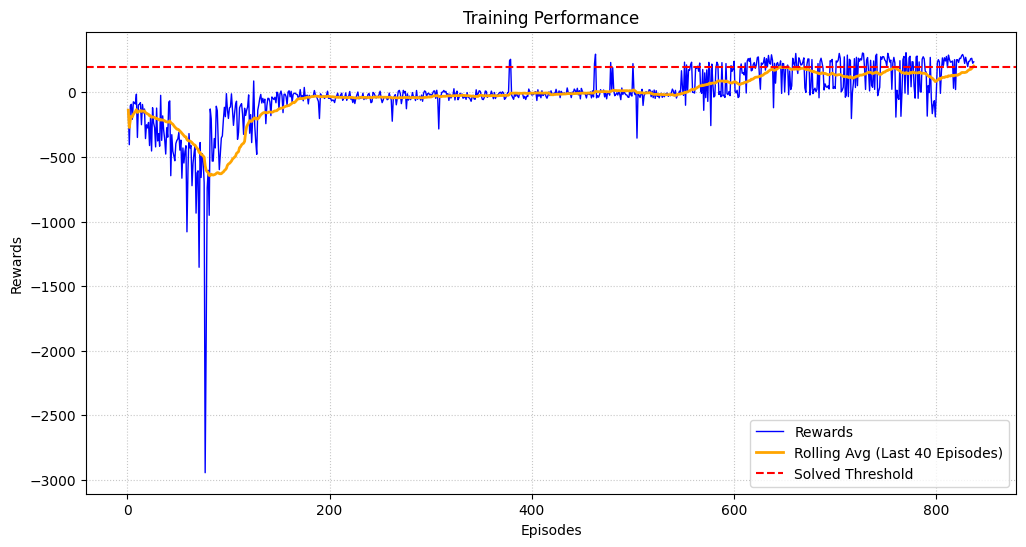

In [12]:
episodes = []
rewards = []
avg40 = []
steps = []

pattern = r"Episode (\d+) reward=([-\d.]+) avg40=([-\d.]+) steps=(\d+)"

with open(log_file, "r") as f:
    for line in f:
        match = re.search(pattern, line)
        if match:
            ep = int(match.group(1))
            rew = float(match.group(2))
            av = float(match.group(3))
            st = int(match.group(4))

            episodes.append(ep)
            rewards.append(rew)
            avg40.append(av)
            steps.append(st)

# ---- Plotting ----
plt.figure(figsize=(12,6))
plt.plot(episodes, rewards, label="Rewards", color="blue", linewidth=1)
plt.plot(episodes, avg40, label="Rolling Avg (Last 40 Episodes)", color="orange", linewidth=2)

plt.axhline(200, color="red", linestyle="--", label="Solved Threshold")

plt.title("Training Performance")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.grid(True, linestyle=":", alpha=0.7)

plt.legend()
plt.show()

In [13]:


# Dictionary to store values
metadata = {}

with open(metadata_file, "r") as f:
    for line in f:
        if ":" in line:
            key, value = line.strip().split(":", 1)
            metadata[key.strip()] = value.strip()

# Extract variables
Algorithm    = metadata.get("Algorithm")
Environment  = metadata.get("Environment")
Run_date     = metadata.get("Run Date")
Seed         = metadata.get("Seed")

print(Algorithm, Environment, Run_date, Seed)

DDQN LunarLander-v3 2025-11-21 42
